### Directories

In [306]:
# current working directory
path = os.getcwd()
print("Current Directory:", path)
  
# parent directory
parent = os.path.join(path, os.pardir)
  
# prints parent directory
print("\nParent Directory:", os.path.abspath(parent))

Current Directory: C:\Users\KiahJane\titanic\notebooks

Parent Directory: C:\Users\KiahJane\titanic


### Packages

In [307]:
# imports
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [308]:
# set path of raw data
train_path = os.path.join(os.path.pardir, 'data', 'raw', 'train.csv')
test_path = os.path.join(os.path.pardir, 'data', 'raw', 'test.csv')
# read data w/ all default parameters
train_df = pd.read_csv(train_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_path, index_col = 'PassengerId')

# view type (proof of success)
print(type(train_df))
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Exploratory Data Analysis 

### Basic Data Structure

In [309]:
# use .info() to et brief information about the dataframe (more at: https://www.kaggle.com/c/titanic/data)
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [310]:
## join train_df & test_df in order to work on entire dataset
# add Survived column w/ default value to test_df
test_df['Survived'] = -888 
# concate test_df to train_df 
df = pd.concat((train_df, test_df), axis=0)  #-> passed as tuple; default is axis=0 -> row-wise
#df = pd.concat((train_df, test_df), axis=1)          #-> passed as tuple; axis=1 -> column-wise

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [311]:
# use .head() to view top 5 rows
df.head()

# use .head(n) to view top-n rows
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [312]:
# use .tail() to get last 5 rows
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-888,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [313]:
# select column using .
df.Name

# select column using name as string
df['Name']

# select multiple columns using list of column name strings
df[['Name', 'Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


In [314]:
# select rows 
df.loc[5:10, ]     #-> rows 5-10, all columns

# select rows from select columns
df.loc[5:10, ['Age', 'Pclass']]     #-> rows 5-10, Age & Pclass columns

# select rows from select columns -> position based indexing
df.iloc[5:10, 3:8]     #-> rows 5-10, 3:8 columns

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [315]:
# filter rows based on conditions
male_passengers = df.loc[df.Sex == 'male', :]
print('Number of male passengers : {0}'.format(len(male_passengers)))

# multiple filters -- operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)), :]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers : 843
Number of male passengers in first class: 179


### Summary Statistics

In [316]:
# use .descibre(include = 'all') to get statistics for all columns including non-numeric
df.describe(include = 'all')

# use .describe() to get statistics for all numeric columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [317]:
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean()))  #-> mean of columne 'Fare'
print('Median fare : {0}'.format(df.Fare.median()))  #-> median of columne 'Fare'

Mean fare : 33.29547928134557
Median fare : 14.4542


In [318]:
# disperse measures
print('Minimum fare : {0}'.format(df.Fare.min()))              #-> minimum
print('Maximum fare : {0}'.format(df.Fare.max()))              #-> maximum
print('Range fare : {0}'.format(df.Fare.max() - df.Fare.min()))#-> range
print('25th percentile : {0}'.format(df.Fare.quantile(.25)))   #-> 25 percentile
print('50th percentile : {0}'.format(df.Fare.quantile(.50)))   #-> 50 percentile
print('75th percentile : {0}'.format(df.Fare.quantile(.75)))   #-> 75 percentile
print('Variance fare : {0}'.format(df.Fare.var()))             #-> variance
print('Standard deviation fare : {0}'.format(df.Fare.std()))   #-> standard deviation

Minimum fare : 0.0
Maximum fare : 512.3292
Range fare : 512.3292
25th percentile : 7.8958
50th percentile : 14.4542
75th percentile : 31.275
Variance fare : 2678.959737892891
Standard deviation fare : 51.75866823917411


<AxesSubplot:>

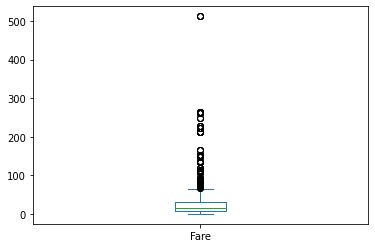

In [319]:
# box-whisker plot
df.Fare.plot(kind = 'box')

In [320]:
# column count -- categorical
df.Sex.value_counts()

# column proportions -- categorical
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [321]:
# column count on Survived
df[df.Survived != -888].Survived.value_counts()   #-> not observing values of -888; this is from test_df which didnt have data on the Survived column

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Class wise passenger count'}>

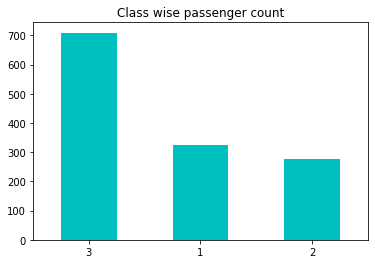

In [322]:
# column count on Passenger count
df.Pclass.value_counts()

# visualize 
df.Pclass.value_counts().plot(kind = 'bar')

# add title (title=), set color (color=), rotate bargraph (rot=)
df.Pclass.value_counts().plot(kind = 'bar', rot = 0, title = 'Class wise passenger count', color = 'c')

### Distributions

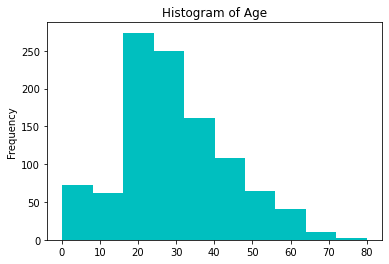

In [323]:
# use hist to create histogram
df.Age.plot(kind = 'hist', title = 'Histogram of Age', color = 'c');   #-> ';' removes the description above the graph

# change the number of bars with 'bins'
df.Age.plot(kind = 'hist', title = 'Histogram of Age', color = 'c', bins = 20);

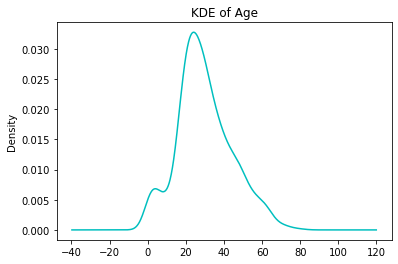

In [324]:
# use kde for density plot
df.Age.plot(kind = 'kde', title = 'KDE of Age', color = 'c'); 

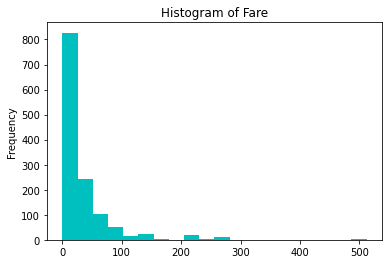

In [325]:
# histogram for fare
df.Fare.plot(kind = 'hist', title = 'Histogram of Fare', color = 'c', bins = 20);

In [326]:
# print plot skewness
print('Skewness for age : {0:2f}'.format(df.Age.skew()))
print('Skewness for fare : {0:2f}'.format(df.Fare.skew()))

Skewness for age : 0.407675
Skewness for fare : 4.367709


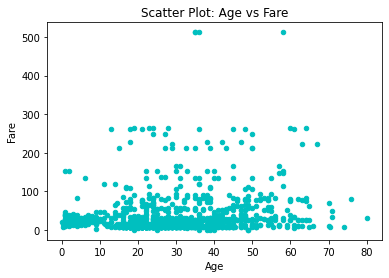

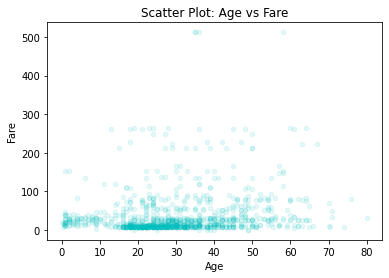

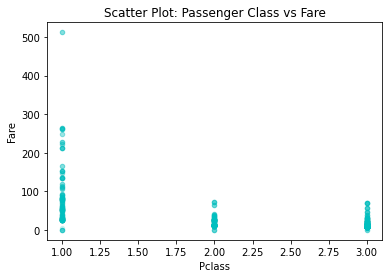

In [327]:
# scatter plot for bivariate distribution
df.plot.scatter(x = 'Age', y = 'Fare', color = 'c', title = 'Scatter Plot: Age vs Fare');

# use alpha to set transparency
df.plot.scatter(x = 'Age', y = 'Fare', color = 'c', title = 'Scatter Plot: Age vs Fare', alpha = 0.1);
df.plot.scatter(x = 'Pclass', y = 'Fare', color = 'c', title = 'Scatter Plot: Passenger Class vs Fare', alpha = 0.15);

### Grouping and Aggregations

In [328]:
# group by
df.groupby('Sex').Age.median()  #-> separated column Age by column Sex into two groups, then found age median of each group
df.groupby(['Sex']).Age.median()  #-> same as above

# more group by examples
df.groupby(['Pclass']).Fare.median()  #-> separated column Fare by column Pclass into 3 groups, then found fare median of each group
df.groupby(['Pclass']).Age.median()  #-> median age of each passenger class
df.groupby(['Pclass'])['Fare', 'Age'].median()  #-> median fare and age of each passenger class

# group by with multiple variables
df.groupby(['Pclass', 'Embarked']).Fare.median() #-> median fare for each passenger class and place of embarkment

C:\Users\KiahJane\AppData\Local\Temp/ipykernel_23496/2901787443.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Pclass'])['Fare', 'Age'].median()  #-> median fare and age of each passenger class


Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [329]:
# group by and aggreation together
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'}) #-> mean fare & median age of each passenger class

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [330]:
## complicated aggregation example
# dictionary of desired aggregations
aggregations = {
    'Fare': {                    # working on the fare column
        'mean_Fare': 'mean',
        'median_Fare': 'median',
        'min_Fare': min,
        'max_Fare': max
    },
    'Age': {                    # working on the age column
        'median_Age': 'median',
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)
    }
}
df.groupby(['Pclass']).agg(aggregations)

## above is not working although it should.. atm irrelevant so I am skipping

SpecificationError: nested renamer is not supported

### Crosstabs

In [ ]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

# visualize
pd.crosstab(df.Sex, df.Pclass).plot(kind = 'bar');

### Pivots

In [ ]:
# pivot table
df.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Age', aggfunc = 'mean')

# the following relays the same information in a different format
df.groupby(['Sex', 'Pclass']).Age.mean()

# the following is identical to the pivot table
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

## Data Munging

In [ ]:
# use .info() to detect any missing values
df.info()

#### Feature: Embarked column

In [ ]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]      #-> trying to decide which values to impute for NaN in the Embarked column

In [331]:
# observe how many people embarked at different points
df.Embarked.value_counts()          #-> most passengers boarded at Southhampton 

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [332]:
# both passengers with missing Embarked values survived
# use crosstabs to see which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)  #-> Southhampton; although a big percentage of passengers from 'S' died

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [333]:
# impute the missing values with 'S' with one of the following alternatives:
#df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
#df.Embarked.fillna('S', inplace=True)

#-> however, further investigation is good:

In [334]:
# both passengers with missing Embarked values paid a fare of 80
# explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()   #-> median fare of passengers from 'C' is closest to 80

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [335]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace = True)

In [336]:
# check if any missing values remain
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [337]:
# check df info again & proof for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


#### Feature: Fare

In [338]:
# extract rows with Fare as Null
df[df.Fare.isnull()]      #-> trying to decide which values to impute for NaN in the Fare column

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [339]:
# to replace the missing Fare value, take the median fare from other passengers in 3rd class who borded at Southhampton
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)
df.Fare.fillna(median_fare, inplace = True)

# proof
df.info()

8.05


#### Feature: Age

In [341]:
# set maximum number of rows to be displaced (keep computer from being slow)
pd.options.display.max_rows = 15

# return null rows in Age column 
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1300,-888,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,-888,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [342]:
# several missing values -- the simplest option is to replace all missing values with the mean value
# but first explor the distribution 

<AxesSubplot:ylabel='Frequency'>

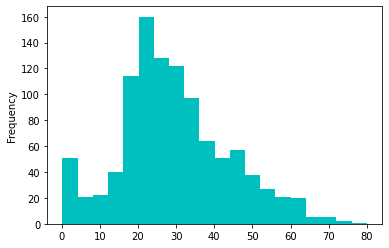

In [343]:
# visualize distribution
df.Age.plot(kind = 'hist', bins = 20, color = 'c')  #-> there are a few extreme outliers, causing a positive skewness

In [344]:
# mean age
df.Age.mean()  #-> possibly significantly influenced by extreme outliers

29.881137667304014

In [345]:
# mean influenced by outliers
# possible that Age distribution is different by Sex

# run median value of Age grouped by Sex
df.groupby('Sex').Age.median()    #-> median age similar for both sexes

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

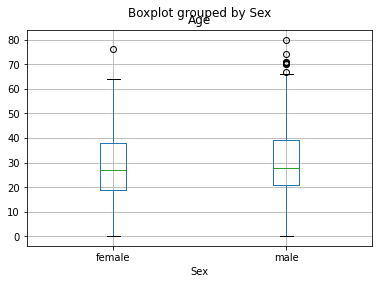

In [346]:
# visualize Age distribution grouped by Sex with only non-NULL values -- boxplot 
df[df.Age.notnull()].boxplot('Age', 'Sex');   #-> both distributions very similar for both sexes; 
                                              #-> Sex not worth considering to replacce missing values in Age

# however to replace missing Age values based on Sex, use the following:
#age_sex_median = df.groupby('Sex').Age.transform('median')
#df.Age.fillna(are_sex_median, inplace = True)

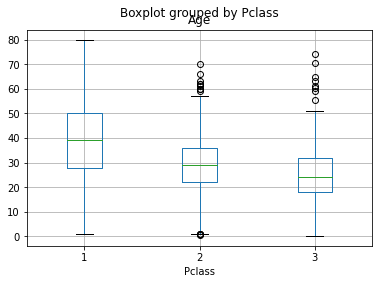

In [347]:
# explore further with the Pclass column
# visualize Age distribution grouped by Pclass with only non-NULL values -- boxplot 
df[df.Age.notnull()].boxplot('Age', 'Pclass');    #-> diff. distributions for diff. passenger class
                                                  #-> better option for imputing data

In [348]:
# to replace missing Age values based on Pclass, use the following:
#age_pclass_median = df.groupby('Pclass').Age.transform('median')
#df.Age.fillna(age_pclass_median, inplace = True)

# however further data exploration is good:

In [349]:
# names of passengers (Miss vs Mrs, etc.) could indicate age
# view Name column
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [350]:
# function to extract title from name in Name column
def GetTitle(name):
    first_name_with_title = name.split(',')[1]     #-> split the name where ',' is; take the 2nd part
    title = first_name_with_title.split('.')[0]    #-> split the name where '.' is; take the 1st part
    title = title.strip().lower()                  #-> strip out white spaces; make lowercase
    return(title)

# use map function to apply the new GetTitle function on each Name value in i
df.Name.map(lambda x : GetTitle(x))    #-> here 'x' represents the Name attribute

# alternative code:
#df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [351]:
# view unique titles in dataset
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [352]:
# new GetTitle function to extract the title from the name
def GetTitle(name):
    title_group = {'mr':'Mr',            #-> consolidate titles
                   'mrs':'Mrs',
                   'miss':'Miss',
                   'master':'Master',
                   'don':'Sir',
                   'rev':'Sir',
                   'dr':'Officer',
                   'ms':'Mrs',
                   'mme':'Mrs',
                   'major':'Officer',
                   'lady':'Lady',
                   'sir':'Sir',
                   'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'}
    first_name_with_title = name.split(',')[1]     #-> split the name where ',' is; take the 2nd part
    title = first_name_with_title.split('.')[0]    #-> split the name where '.' is; take the 1st part
    title = title.strip().lower()                  #-> strip out white spaces; make lowercase
    return(title_group[title])

# create Title feature (column) & save titles
df['Title'] = df.Name.map(lambda x : GetTitle(x))

# proof
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


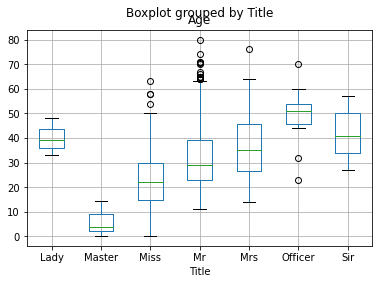

In [353]:
# visualize Age distribution grouped by Title with only non-NULL values -- boxplot 
df[df.Age.notnull()].boxplot('Age', 'Title');

In [354]:
# replace missing Age values based on Title, use the following:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace = True)

# proof
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 165.2+ KB


### Working with Outliers

#### Feature: Age

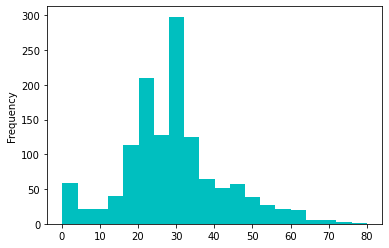

In [355]:
# visualize distribution -- histogram
df.Age.plot(kind = 'hist', bins = 20, color = 'c');

In [356]:
# view outliers -- values over 70
df.loc[df.Age > 70]      #-> 6 passengers; 1 w/ Age 80

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,-888,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


#### Feature: Fare

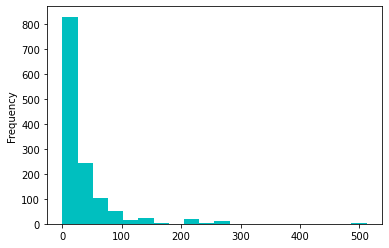

In [357]:
# visualize distribution -- histogram
df.Fare.plot(kind = 'hist', bins = 20, color = 'c');

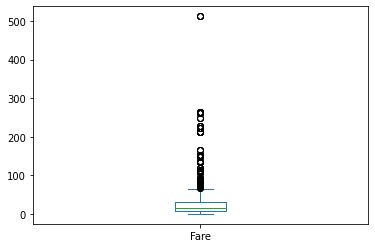

In [358]:
# identify outliers -- boxplot
df.Fare.plot(kind = 'box');

In [359]:
# view outliers
df.loc[df.Fare == df.Fare.max()]   #-> 4 passengers paid exceptionally more; same ticket number -- traveling together

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


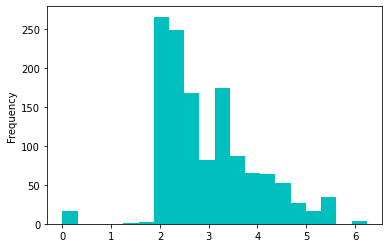

In [360]:
# transform to reduce skewness -- log
LogFare = np.log(df.Fare + 1.0)   # adding 1 to acoomodate zero fares: log(0) is not defined

# visualize transformation -- histogram
LogFare.plot(kind = 'hist', color = 'c', bins = 20);

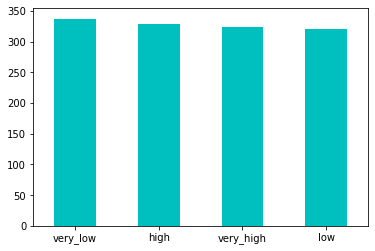

In [361]:
# transform to reduce skewness -- binning
pd.qcut(df.Fare, 4)    # quantile based binning --> split into 4 equally-sized bins

# specify bin names 
pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high'])

# visualize binning
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [362]:
# create fare bin feature (column)
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

# proof
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low


### Feature Engineering

#### Feature: Age State (Adult/Child)

In [363]:
# children were likely put on lifeboats and had a higher survival rate; create AgeState to test idea
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')  # np.where(<comparison>, <value of true condition>, <value of false cond.>)

# view
df['AgeState'].value_counts()

# crosstab -- AgeState & Survived
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)  #-> higher survival rate in children

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


#### Feature: FamilySize

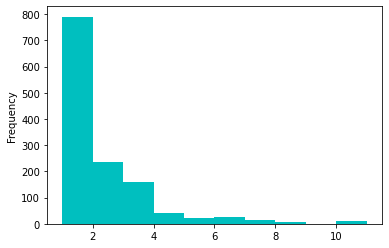

In [364]:
# it's likely that families were put on the lifeboats together
# the following tests this idea
# Family column created: add parent and sibling columns
df['FamilySize'] = df.Parch + df.SibSp + 1     # +1 for the individual

# visualize
df['FamilySize'].plot(kind='hist', color='c');

In [365]:
# further explore
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize', 'Ticket']]
                #-> family of 11; 7 didn't survive; it's reasonable to assume the remaining 4 didn't either

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [366]:
# crosstab to observe the impact of FamilySize on the survival rate (Survived)
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### Feature: IsMother

In [367]:
# women with babies were probably given priority for a place in the lifeboats
# test: women older than 18 (Age >18, who has children (Parch >0), who is married (Title != Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Age > 18) & (df.Parch > 0) & (df.Title != 'Miss')), 1, 0)
                    # np.where(<comparison>, <value of true condition>, <value of false cond.>)

#crosstab to view selected data w/ Survived column
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)  #-> motherhood has an impact on survival

IsMother,0,1
Survived,,
0,533,16
1,303,39


#### Deck

In [368]:
# passengers' locations on the ship could also impact the chance of survival (better lifeboats, etc.)
# explore cabin values
df.Cabin
df.Cabin.unique()    #-> letters likely represent different decks; 'T' stands out as different

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [369]:
# observe passengers in cabin 'T'
df.loc[df.Cabin == "T"]      #-> only 1 passenger; input is likely an error

# set 'T' to Nan (highly unlikely that 1 passenger had an entire deck alone)
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

# proof 
df.Cabin.unique()    #-> no more 'T'

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [370]:
# create decks based on letters of the cabin numbers
# extract first cabin character 
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')   # 'Z' used for NaN values
                 # np.where(<comparison>, <value of true condition>, <value of false cond.>)

# create Deck feature (column)
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

# proof -- passenger count values of each deck
df.Deck.value_counts()

# crosstab survival and location of cabin
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


### Categorical Feature Encoding

In [371]:
# individual categorical feature encoding -- feature Sex 
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

# multiple categorical feature encoding using get_dummies()
df = pd.get_dummies(df, columns = ['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

# proof
df.info()

# after encoding categorical features, remove unneeded features
# feature to be predicted should be first or last in datatset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int32  
 11  IsMale              1309 non-null   int32  
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

### Drop and Reorder Columns

In [373]:
# after encoding categorical features, unneeded features will be removed
# drop columns from dataframe
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)   # axis=1 to drop columns
        # if run several times, an error will show bcz the columns are already removed

# feature to be predicted should be first or last in datatset
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [305]:
# proof
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int32  
 5   IsMale              1309 non-null   int32  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_Z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

## Save Processed Dataset

In [378]:
# directories -- current & parent
print("Current Directory:", path)
print("\nParent Directory:", os.path.abspath(parent))

# create path to save files
write_train_path = os.path.join(os.path.pardir, 'data', 'processed', 'train.csv')
write_test_path = os.path.join(os.path.pardir, 'data', 'processed', 'test.csv')

# save train & test as separate files (merged at the beginning of analysis)
# train data -- filter out test data
df.loc[df.Survived != -888].to_csv(write_train_path)
# test data -- raw data didn't have 'Survived' 
columns = [column for column in df.columns if column != 'Survived']  # columns of dataset w/o 'Survived' -> included in next line of code
df.loc[df.Survived == -888, columns].to_csv(write_test_path)         # loc[] selects for specific values in 'Survived'
                                                                     # necessary to add other columns also

Current Directory: C:\Users\KiahJane\titanic\notebooks

Parent Directory: C:\Users\KiahJane\titanic


## Building the Data Processing Script

In [480]:
# create data script to save in 'src' folder
get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [492]:
%%writefile $get_processed_data_script_file
import pandas as pd
import numpy as np
import os

def read_data():
    # set the path to raw data
    train_path = os.path.join(os.path.pardir, 'data', 'raw', 'train.csv')
    test_path = os.path.join(os.path.pardir, 'data', 'raw', 'test.csv')
    # read data w/ all default parameters
    train_df = pd.read_csv(train_path, index_col = 'PassengerId')
    test_df = pd.read_csv(test_path, index_col = 'PassengerId')
    # concate test_df to train_df
    test_df['Survived'] = -888 
    df = pd.concat((train_df, test_df), axis=0)
    
    return df

def process_data(df):
    
    return (df
            # create title feature
            .assign(Title = lambda x: x.Name.map(GetTitle))
            # fill in missing values
            .pipe(fill_missing_values)
            # create fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
            # create age state feature
            .assign(AgeState = lambda x: np.where(x['Age'] >= 18, 'Adult', 'Child'))
            # create family size feature
            .assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
            # create mother feature
            .assign(IsMother = lambda x: np.where(((x.Sex == 'female') & (x.Age > 18) & (x.Parch > 0) & (x.Title != 'Miss')), 1, 0))
            # create cabin feature
            .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
            # create deck feature
            .assign(Deck = lambda x: x.Cabin.map(get_deck))
            # feature encoding
            .assign(IsMale = lambda x: np.where(x.Sex == 'male', 1, 0))
            .pipe(pd.get_dummies, columns = ['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
            # drop unnecessary columns
            .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)
            # reorder columns
            .pipe(reorder_columns)
            )


def GetTitle(name):
    title_group = {'mr':'Mr',            
                   'mrs':'Mrs',
                   'miss':'Miss',
                   'master':'Master',
                   'don':'Sir',
                   'rev':'Sir',
                   'dr':'Officer',
                   'ms':'Mrs',
                   'mme':'Mrs',
                   'major':'Officer',
                   'lady':'Lady',
                   'sir':'Sir',
                   'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'}
    first_name_with_title = name.split(',')[1]      
    title = first_name_with_title.split('.')[0]     
    title = title.strip().lower()                   
    return(title_group[title])

def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def fill_missing_values(df):
    # embarked feature
    df.Embarked.fillna('C', inplace = True)
    # fare feature
    median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
    df.Fare.fillna(median_fare, inplace = True)
    # age feature
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace = True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data(df):
    # where to save
    train_path = os.path.join(os.path.pardir, 'data', 'raw', 'train.csv')
    test_path = os.path.join(os.path.pardir, 'data', 'raw', 'test.csv')
    # train data
    df.loc[df.Survived != -888].to_csv(write_train_path)
    # test data
    columns = [column for column in df.columns if column != 'Survived']  
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [493]:
# proof script
!python $get_processed_data_script_file

Traceback (most recent call last):
  File "..\src\data\get_processed_data.py", line 104, in <module>
    write_data(df)
  File "..\src\data\get_processed_data.py", line 96, in write_data
    df.loc[df.Survived != -888].to_csv(write_train_path)
NameError: name 'write_train_path' is not defined


In [491]:
# read files
train_df = pd.read_csv(write_train_path)
train_df.info()
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Age                 891 non-null    float64
 3   Fare                891 non-null    float64
 4   FamilySize          891 non-null    int64  
 5   IsMother            891 non-null    int64  
 6   IsMale              891 non-null    int64  
 7   Deck_A              891 non-null    int64  
 8   Deck_B              891 non-null    int64  
 9   Deck_C              891 non-null    int64  
 10  Deck_D              891 non-null    int64  
 11  Deck_E              891 non-null    int64  
 12  Deck_F              891 non-null    int64  
 13  Deck_G              891 non-null    int64  
 14  Deck_Z              891 non-null    int64  
 15  Pclass_1            891 non-null    int64  
 16  Pclass_2

## Advanced Visualization -- Matplotlib

In [413]:
# import package
import matplotlib.pyplot as plt
%matplotlib inline

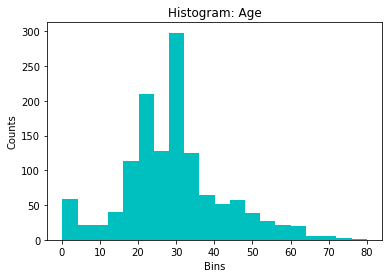

In [416]:
# visualize -- histogram
plt.hist(df.Age, bins = 20, color = 'c')
plt.title('Histogram: Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

# visualize -- histogram -- same as above but handy when subplots needed
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram: Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

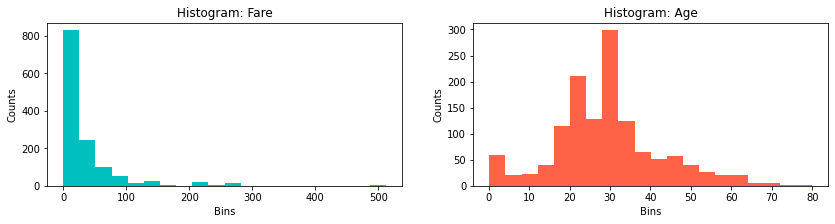

In [419]:
# visualize -- histogram -- subplots (plotted next to one another)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# plot1
ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram: Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

# plot2
ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram: Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

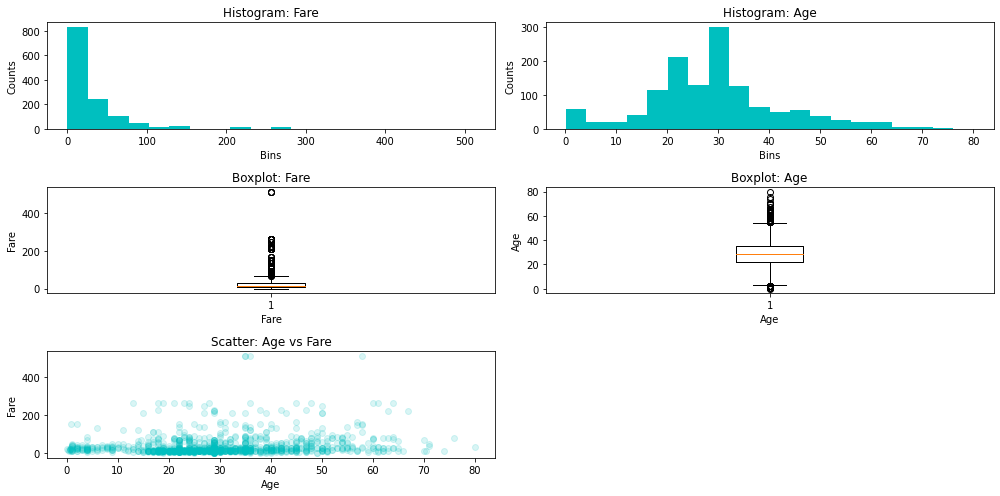

In [423]:
# visualize -- histogram -- subplots (plotted next to one another)
f, ax_arr = plt.subplots(3, 2, figsize=(14, 7))

# plot1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram: Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# plot2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram: Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# plot3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot: Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# plot4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot: Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# plot5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter: Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')  # remove empty 6th plot
plt.tight_layout()       # fix overlapping plots

plt.show()

In [ ]:
    df = df.assign(Title = lambda x: x.Name.map(GetTitle))
    df = df.pipe(fill_missing_values)
    df = df.assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
    df = df.assign(AgeState = lambda x: np.where(x['Age'] >= 18, 'Adult', 'Child'))
    df = df.assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
    df = df.assign(IsMother = lambda x: np.where(((x.Sex == 'female') & (x.Age > 18) & (x.Parch > 0) & (x.Title != 'Miss')), 1, 0))
    df = df.assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
    df = df.assign(Deck = lambda x: x.Cabin.map(get_deck))
    df = df.assign(IsMale = lambda x: np.where(x.Sex == 'male', 1, 0))
    df = df.pipe(pd.get_dummies, columns = ['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
    print ('hej', type(df))
    df = df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)
    print ('hej', type(df))
    df = df.pipe(reorder_columns)

    
    return df
           
            